# Importing Required Libraries

In [1]:
#data Manipulation
import pandas as pd

#Mathematical operation
import numpy as np

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Remove Warnings
import warnings
warnings.filterwarnings('ignore')

#Ml Algoriothm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb



In [2]:
#Load the dataset
air=pd.read_csv(r"C:\Users\Lenovo\Documents\jupyter\DataSets\Passanger_booking_data.csv")
air.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
22398,1,Internet,RoundTrip,38,42,3,Sat,PEKSYD,Australia,1,1,1,8.58,0
40625,3,Internet,RoundTrip,55,5,5,Mon,LOPTPE,Taiwan,1,1,0,4.67,0
32855,3,Internet,RoundTrip,102,4,11,Fri,ICNSIN,South Korea,1,0,0,6.62,0
20437,1,Internet,RoundTrip,157,40,1,Mon,MELTPE,Australia,1,0,0,8.83,0
19599,1,Internet,RoundTrip,193,28,9,Mon,MELRGN,Australia,1,1,1,8.83,0
25227,1,Internet,RoundTrip,87,36,7,Thu,SUBSYD,Australia,1,0,0,8.58,0
37453,3,Internet,RoundTrip,79,5,12,Fri,DPSICN,South Korea,0,0,0,6.62,0
23799,1,Internet,RoundTrip,97,28,9,Fri,PERTPE,Taiwan,1,1,0,5.62,0
18975,1,Mobile,RoundTrip,53,21,12,Sat,MELPEN,Australia,1,1,1,8.83,0
12900,3,Internet,RoundTrip,21,24,17,Thu,HNDSUB,Indonesia,1,1,1,7.57,1


In [3]:
#check for shape
air.shape

(50002, 14)

In [4]:
#Check for all columns
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [5]:
#check for info
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

**From above cell we see that there is -** 

**1. total 14 columns**

**2. One column contain float value**

**3. Eight column conatain integer value**

**4. Five object column** 

In [6]:
#Checking null value
air.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

**From above cell we see that there is no any null value in all columns**

In [7]:
#check for duplicates
air.duplicated().sum()

719

**From cell we see that there is 719 duplicate value present in our data so we have to remove those duplicate values**

In [8]:
#Dropping duplicates
air.drop_duplicates(inplace=True)

In [9]:
air.duplicated().sum()

0

**Now we see that there are no duplicates present in our data**

**From above cell we describe the object columns of our data-**

In [10]:
# Describe the summary statistics of  numerical columns
air.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000,49283.000000
mean,1.590204,84.723393,23.054197,9.070613,0.668222,0.295639,0.426638,7.279937,0.149991
std,1.016540,90.409389,33.831644,5.413007,0.470856,0.456334,0.494594,1.496381,0.357066
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


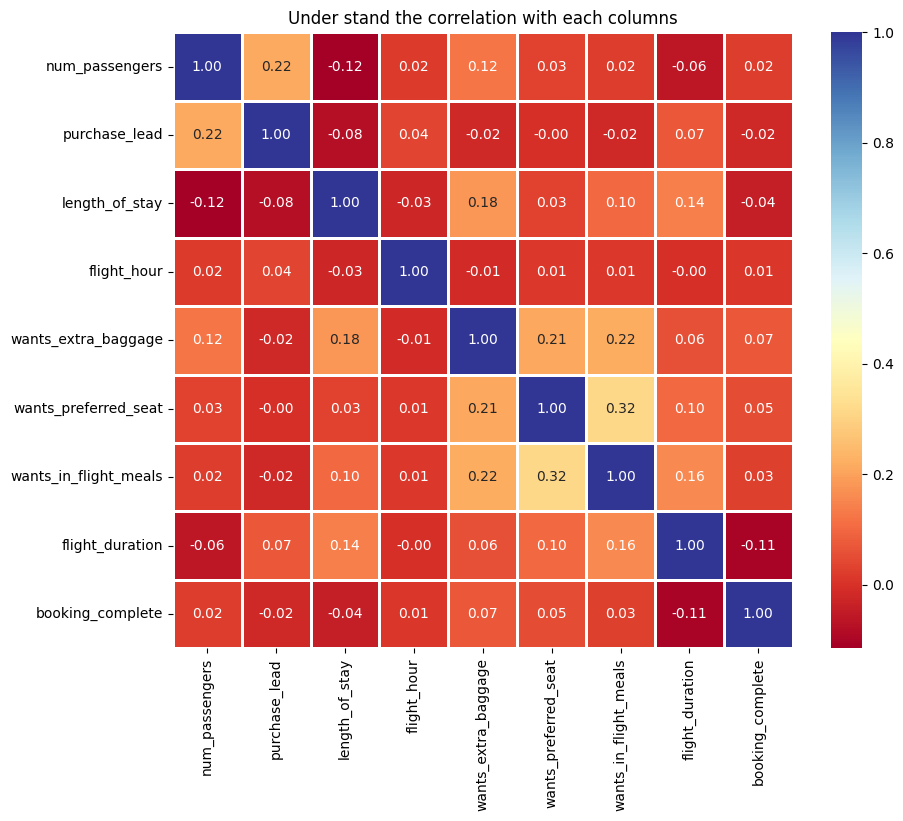

In [11]:
# Visualize the correlation map
plt.figure(figsize=(10,8))
sns.heatmap(air.corr(),annot=True,cmap='RdYlBu',fmt='.2f',
    annot_kws=None,
    linewidths=1)
plt.title("Under stand the correlation with each columns")
plt.show()

## Univariate Analysis

### 1. num_passenger(Number of passenger)

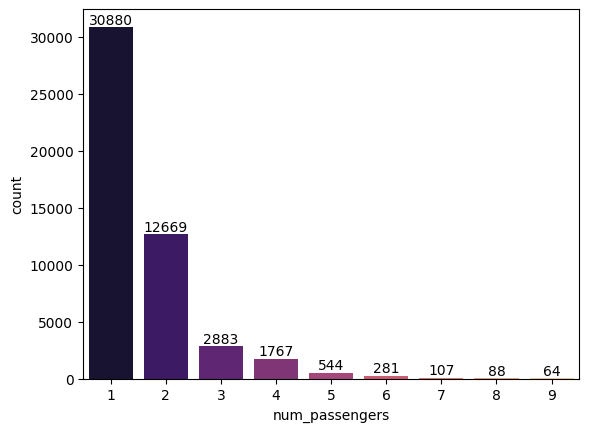

In [12]:
ax=sns.countplot(x='num_passengers',data=air,palette='magma')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

**`num_passenger` - means number of passengers per booking**

**From above count plot we see that in `num_passenger` column there are `9` unique categories that starts  from `1` and end by `9`.** 
1. `1`-`30880`
2. `2`-`12669`
3. `3`-`2883`
4. `4`-`1767`
5. `5`-`544`
6. `6`-`281`
7. `7`-`107`
8. `8`- `88`
9. `9`-`64`

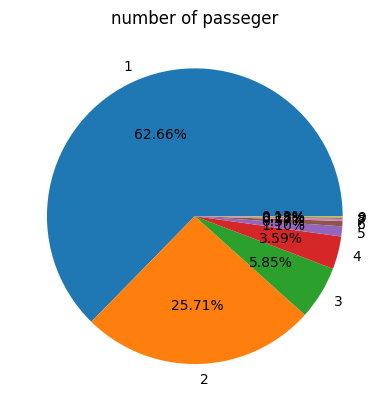

In [13]:
plt.pie(air.num_passengers.value_counts(),labels=air.num_passengers.value_counts().index,autopct='%.2f%%')
plt.title('number of passeger')
plt.show()

### 2.Sales_channel

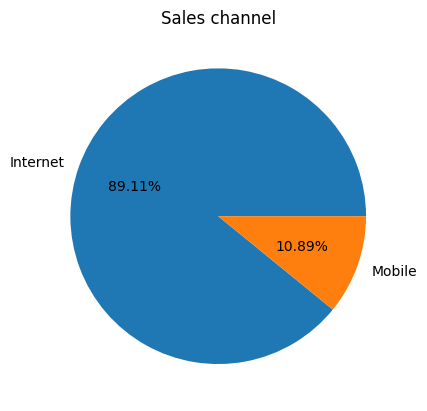

In [14]:
plt.pie(air.sales_channel.value_counts(),labels=air.sales_channel.value_counts().index,autopct='%.2f%%')
plt.title('Sales channel')
plt.show()

**Sales_channel - How passenger try to book their flight**

**From above Pie chart we see that there are `89.11%` people trying to book their flight by `Internet` and `10.89%` people trying to book their flight by `Mobile`**

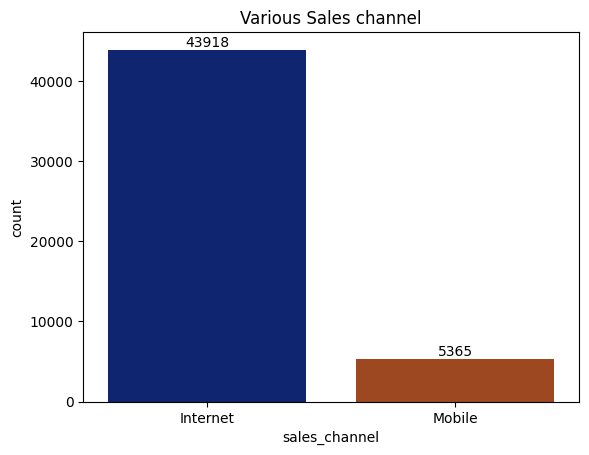

In [15]:
ax=sns.countplot(x='sales_channel',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Various Sales channel")
plt.show()

### 3. trip_types

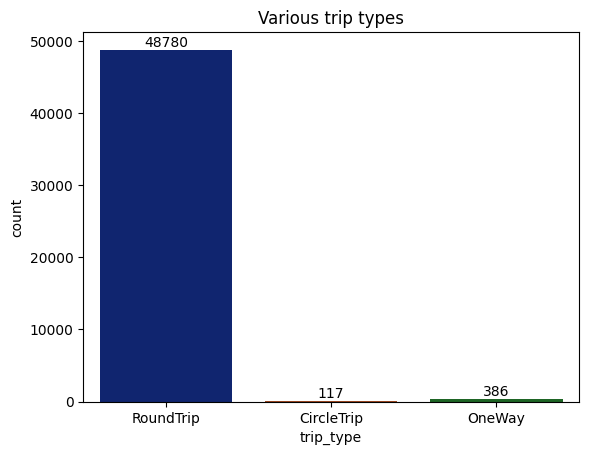

In [16]:
ax=sns.countplot(x='trip_type',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Various trip types")
plt.show()

**`trip_type`- The trip type for people who are booking their flight as `Round Trip` or `Circle Trip` or `One Way`.** 
1. `RoundTrip`- there are `48780` people going via RoundTrip.
2. `CircleTrip`- there  are `117` people going via CircleTrip.
3. `OneWayTrip`- there  are `386` people going via OneWayTrip.

### Purchase_lead

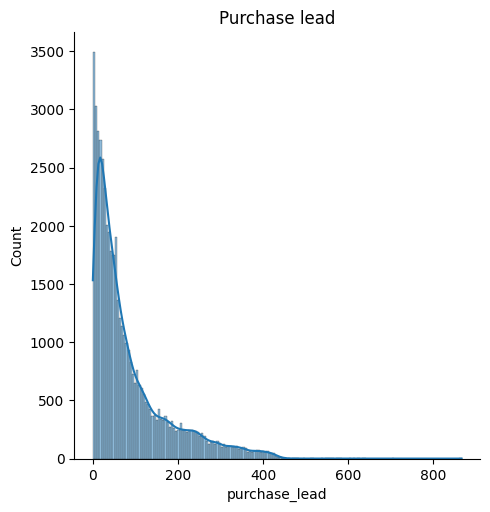

In [17]:
sns.displot(air.purchase_lead ,kind='hist',kde=True)
plt.title("Purchase lead")
plt.show()

**Purchase_lead - it is queue of booking the flight**

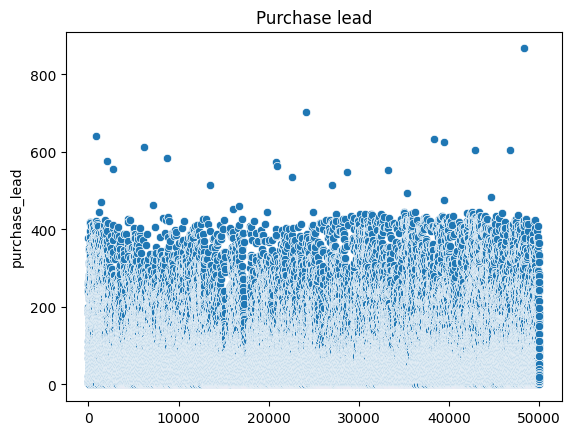

In [18]:
sns.scatterplot(air.purchase_lead )
plt.title("Purchase lead")
plt.show()

### Length_of_stay

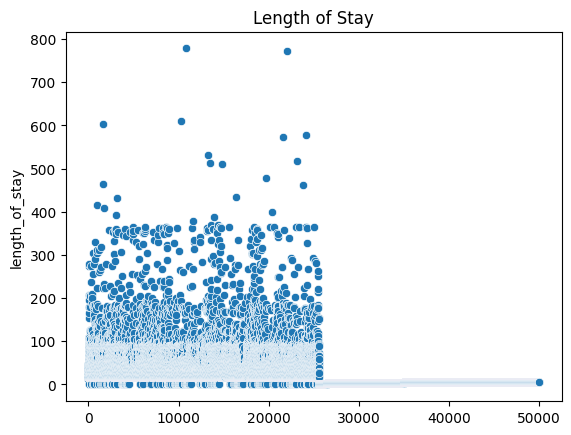

In [19]:
sns.scatterplot(air.length_of_stay )
plt.title("Length of Stay")
plt.show()

### flight_hour

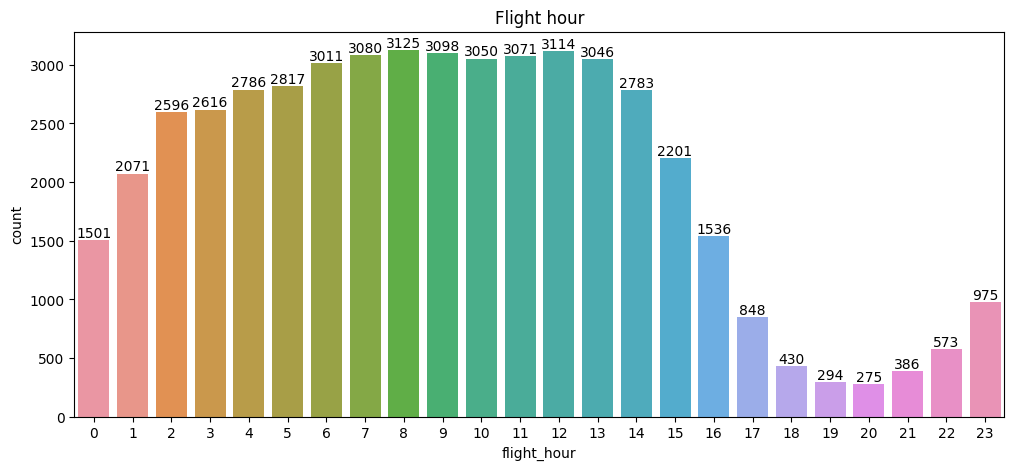

In [20]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='flight_hour',data=air)
for label in ax.containers:
    ax.bar_label(label)
plt.title("Flight hour")
plt.show()

**`flight_hour`- Departure time of flight**

**maximum people want to book their flight for `8 AM`.**

In [21]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### flight_day

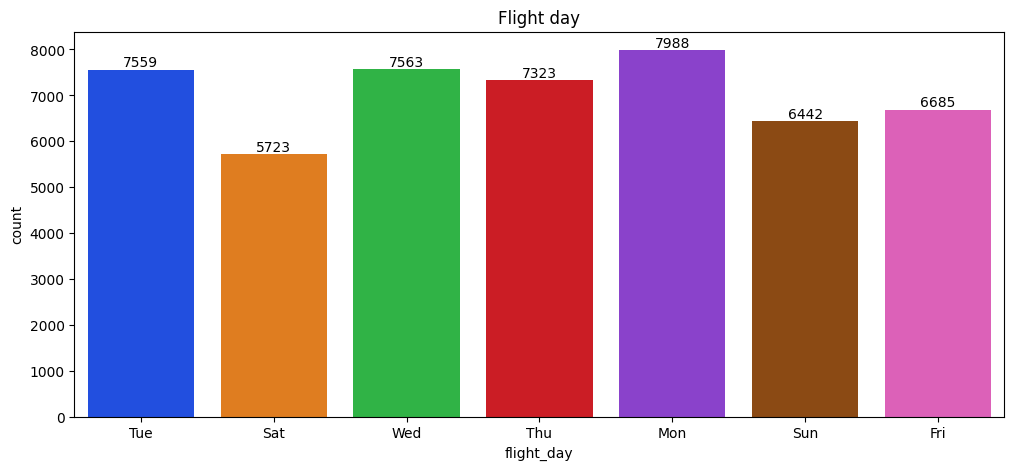

In [22]:
plt.figure(figsize=(12,5))
ax=sns.countplot(x='flight_day',data=air,palette='bright')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Flight day")
plt.show()

**`flight_day`-which day people want their flight**

**maximum people want their flight on `Monday`.**

### route(Route of flights)

In [23]:
air['route'].unique()

array(['AKLHGH', 'AKLDEL', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

### booking_origin(country where people want to go)

In [24]:
air['booking_origin'].unique()

array(['Australia', 'New Zealand', 'India', 'United Kingdom', 'China',
       'South Korea', 'Canada', 'Japan', 'Malaysia', 'Singapore',
       'Switzerland', 'Germany', 'Indonesia', 'Czech Republic', 'Vietnam',
       'Thailand', 'Spain', 'Romania', 'Ireland', 'Italy', 'Slovakia',
       'United Arab Emirates', 'Tonga', 'Réunion', '(not set)',
       'Saudi Arabia', 'Netherlands', 'Qatar', 'Hong Kong', 'Philippines',
       'Sri Lanka', 'France', 'Croatia', 'United States', 'Laos',
       'Hungary', 'Portugal', 'Cyprus', 'Cambodia', 'Poland', 'Belgium',
       'Oman', 'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya',
       'Taiwan', 'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark',
       'Colombia', 'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia',
       'Mauritius', 'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden',
       'Austria', 'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [25]:
x=air['booking_origin'].value_counts().sort_values(ascending=False).head(10)
l=x.index.to_list()

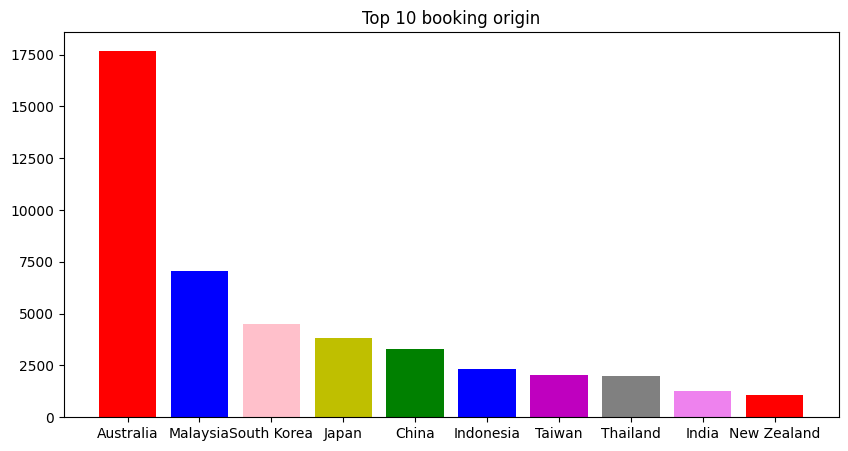

In [26]:
plt.figure(figsize=(10,5))
plt.bar(x.index,x,color=['r','b','pink','y','g','b','m','grey','violet'])

plt.title("Top 10 booking origin")
plt.show()

**From above bar graph we see that maximum people want to go to `Australia`.**

### 1.  wants_extra_baggage
2. wants_perferred_seat
3. wants_in_flight_meals

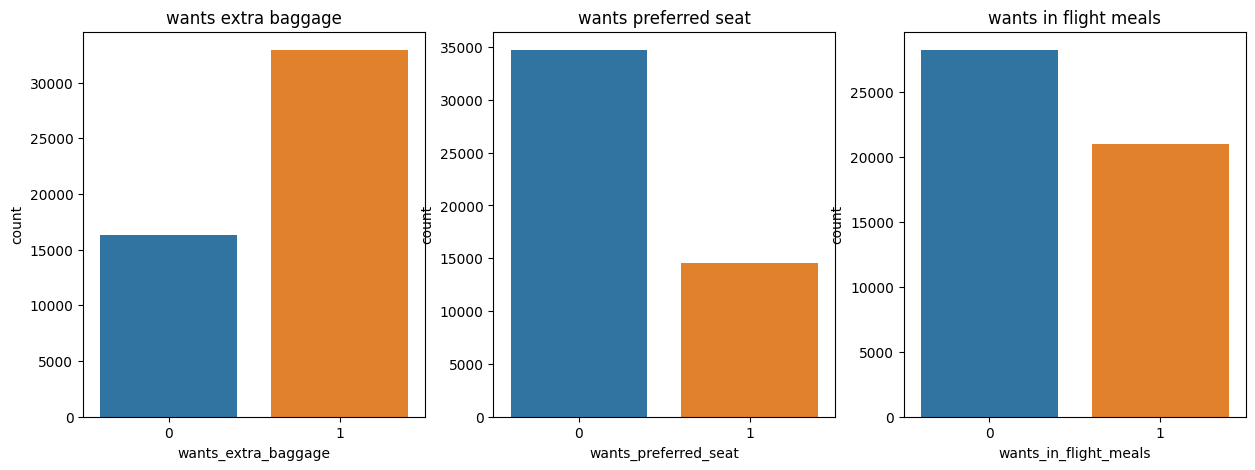

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x='wants_extra_baggage', data=air, ax=axes[0])
axes[0].set_title('wants extra baggage')

sns.countplot(x='wants_preferred_seat', data=air, ax=axes[1])
axes[1].set_title('wants preferred seat')

sns.countplot(x='wants_in_flight_meals', data=air, ax=axes[2])
axes[2].set_title('wants in flight meals')

plt.show()


### flight_duration

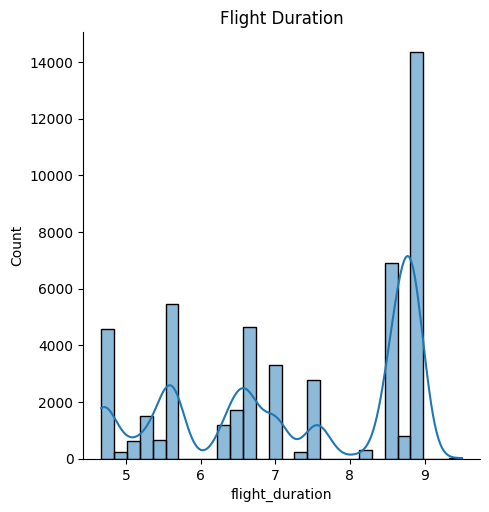

In [28]:
sns.displot(air['flight_duration'] ,kde=True)
plt.title("Flight Duration")
plt.show()

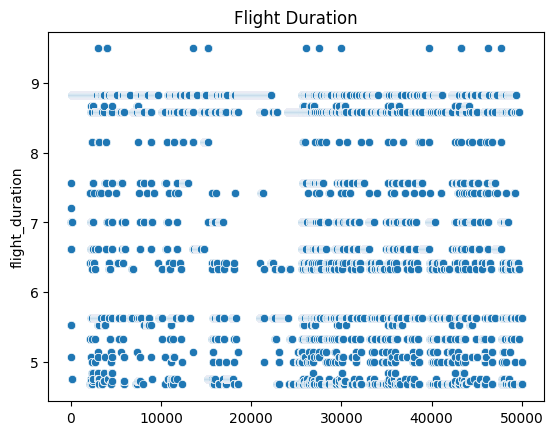

In [29]:
sns.scatterplot(air['flight_duration'])
plt.title("Flight Duration")
plt.show()

### booking_complete(flight booked or not)

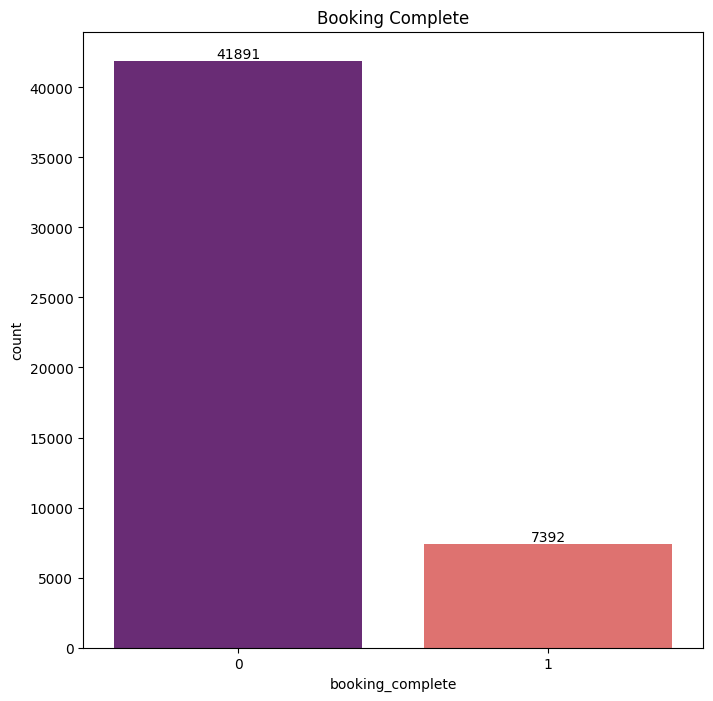

In [30]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='booking_complete',data=air,palette='magma')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Booking Complete")
plt.show()

**From above count plot we see that there are `7392` people's for whom  booking is complete and `41891` people's for whom  booking is not complete**

# Bivariate Analysis

In [31]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

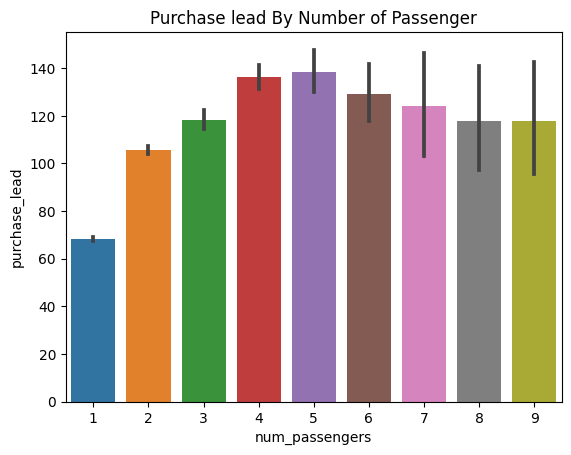

In [32]:
sns.barplot(x='num_passengers',y='purchase_lead',data=air)
plt.title('Purchase lead By Number of Passenger')
plt.show()

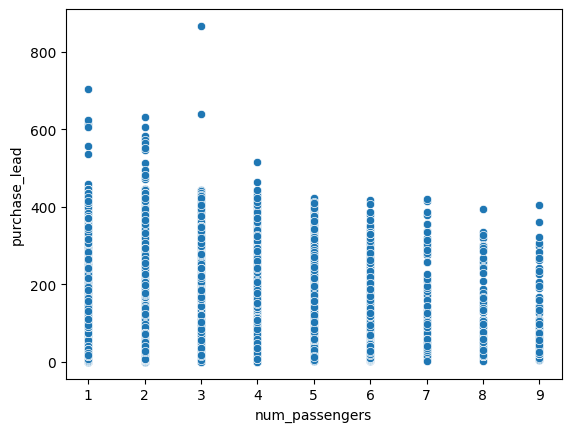

In [33]:
sns.scatterplot(x='num_passengers',y='purchase_lead',data=air)
plt.show()

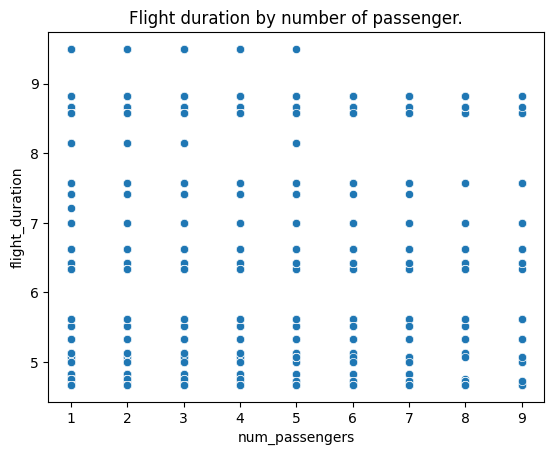

In [34]:
sns.scatterplot(x='num_passengers',y='flight_duration',data=air)
plt.title("Flight duration by number of passenger.")
plt.show()

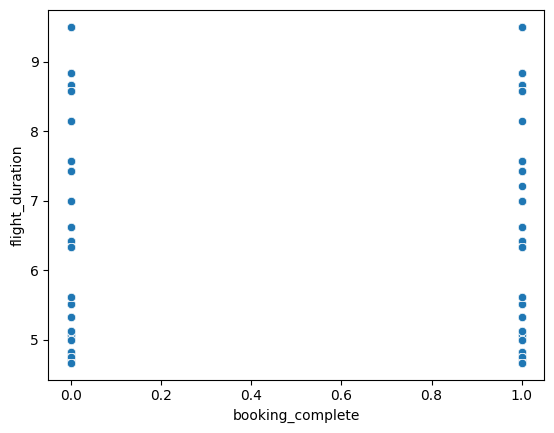

In [35]:
sns.scatterplot(x='booking_complete',y='flight_duration',data=air)
plt.show()

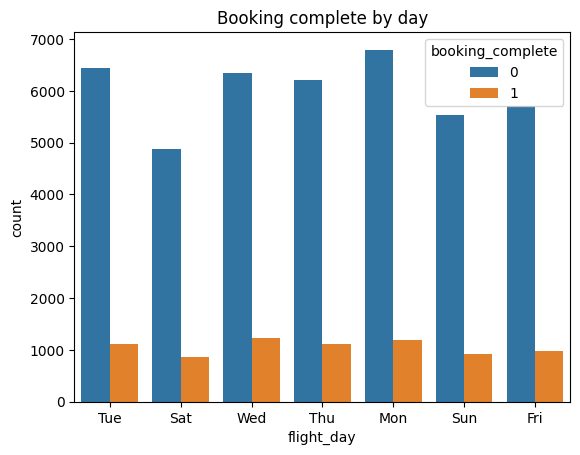

In [36]:
sns.countplot(x=air['flight_day'],hue=air['booking_complete'])
plt.title("Booking complete by day")
plt.show()

**From above count plot we see that maximum people got their booking complete on `Wednesday`.**

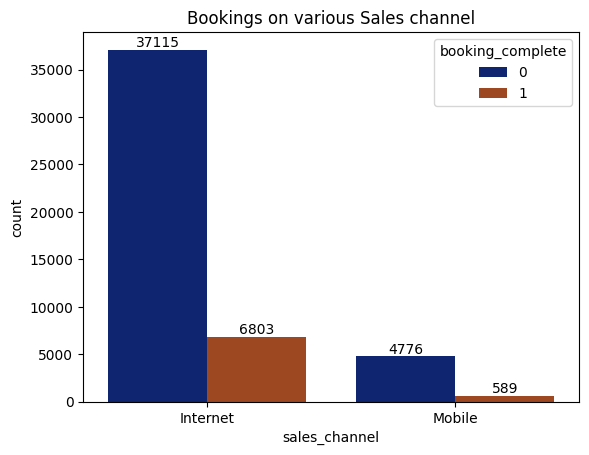

In [37]:
ax=sns.countplot(x='sales_channel',hue='booking_complete',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Bookings on various Sales channel")
plt.show()

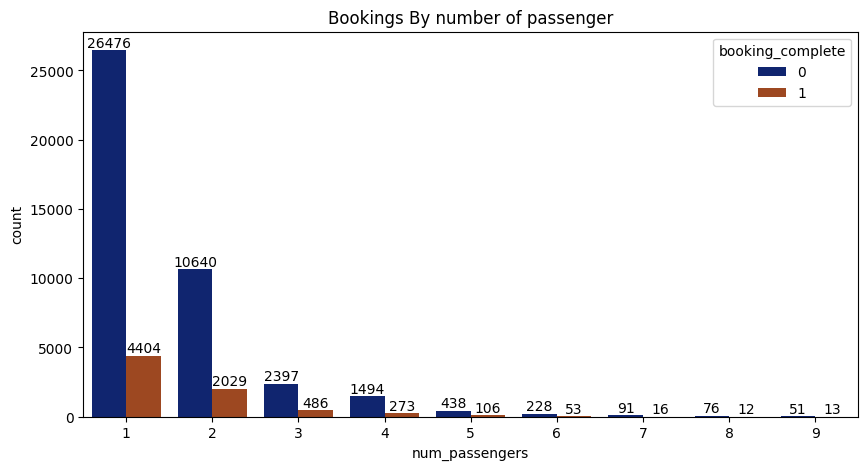

In [38]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='num_passengers',hue='booking_complete',data=air,palette='dark')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Bookings By number of passenger")
plt.show()

# prediction

In [39]:
air

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [40]:

label_encoder = LabelEncoder()
  

air['sales_channel']= label_encoder.fit_transform(air['sales_channel'])
air['trip_type']= label_encoder.fit_transform(air['trip_type'])
air['flight_day']= label_encoder.fit_transform(air['flight_day'])
air['booking_origin']= label_encoder.fit_transform(air['booking_origin'])

**As we show that in our dataset there are many categorical columns for ml algorithm.
So, we have to change categorical columns into discrete columns.
For this, I used sklearn LabelEncoder to Encode columns.**

In [41]:
air

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,0,2,21,12,6,5,AKLHGH,4,0,0,0,7.21,1
1,2,0,2,262,19,7,2,AKLDEL,61,1,0,0,5.52,0
2,1,0,2,112,20,3,2,AKLDEL,61,0,0,0,5.52,0
3,2,0,2,243,22,17,6,AKLDEL,36,1,1,0,5.52,0
4,1,0,2,96,31,4,2,AKLDEL,61,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,27,6,9,2,PERPNH,4,1,0,1,5.62,0
49998,1,0,2,111,6,4,3,PERPNH,4,0,0,0,5.62,0
49999,1,0,2,24,6,22,2,PERPNH,4,0,0,1,5.62,0
50000,1,0,2,15,6,11,1,PERPNH,4,1,0,1,5.62,0


In [42]:
air.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [43]:
x=air[['num_passengers', 'sales_channel', 'trip_type', 
       'length_of_stay', 'flight_hour', 'flight_day',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration']]
x

,num_passengers,sales_channel,trip_type,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1,0,2,12,6,5,4,0,0,0,7.21
1,2,0,2,19,7,2,61,1,0,0,5.52
2,1,0,2,20,3,2,61,0,0,0,5.52
3,2,0,2,22,17,6,36,1,1,0,5.52
4,1,0,2,31,4,2,61,0,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,6,9,2,4,1,0,1,5.62
49998,1,0,2,6,4,3,4,0,0,0,5.62
49999,1,0,2,6,22,2,4,0,0,1,5.62
50000,1,0,2,6,11,1,4,1,0,1,5.62


**In above cell I created a new dataframe that contains high correlation between the  feature and target variable (`booking_complete`).**

In [44]:
y=air[['booking_complete']]
y

,booking_complete
0,1
1,0
2,0
3,0
4,0
...,...
49997,0
49998,0
49999,0
50000,0


**In above cell, I separated target variable `booking_complete`.**

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

**In Above cell-**
- The code splits the dataset into `training` and `testing` sets using the `train_test_split()` function from sklearn.
- The training set is used to train the models, and the testing set is used to evaluate their performance.

- Take `test_size` ratio of `75:25` it means we give 75% data to training and 25% for testing 
- `random_state` = `1` (it means that it takes observations randomly.)

In [46]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier(random_state=1)

# Train the model on the training data
dtc.fit(x_train,y_train)

# Make predictions on the test data
dtc_pred=dtc.predict(x_test)

# Evaluate the model's performance
dtc_accuracy=accuracy_score(dtc_pred,y_test)*100
print(f"Accuracy: {dtc_accuracy:.2f}%")

report = classification_report(dtc_pred, y_test)

# Print the classification report
print("Classification Report:")
print(report)
        



Accuracy: 76.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10297
           1       0.28      0.25      0.26      2024

    accuracy                           0.77     12321
   macro avg       0.57      0.56      0.56     12321
weighted avg       0.76      0.77      0.76     12321



**In above cell i fit a model `DecisionTreeClassifier` on `Training set`**
- Make prediction on `Test set` 
- Accuracy is `76.92%` which is approximately good.

- the Decision Tree Classifier is a powerful and interpretable algorithm that can be effective for various classification tasks.The accuracy of 76.92% obtained from applying the Decision Tree Classifier to the data suggests that the model is correctly predicting the "booking_complete" target variable for approximately 76.92% of the instances in the test set.

Decision Tree Classifier is a popular machine learning algorithm that can be used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the features, aiming to create homogenous subsets with respect to the target variable.

Here's how the Decision Tree Classifier works on the dataset:

1. Data Preparation: The first step is to preprocess the data, handling any missing values, and encoding categorical features if necessary.

2. Feature Selection: The Decision Tree algorithm chooses the most significant feature to split the data at the root node. It evaluates various features based on certain criteria (e.g., Gini impurity, entropy) to determine the one that best separates the data into distinct classes.

3. Splitting Criteria: The selected feature is used to partition the data into subsets. For each value of the chosen feature, a branch (edge) is created in the decision tree, leading to a child node representing a subset of the data.

4. Recursive Splitting: The process is then applied recursively to each subset (child node) until a stopping condition is met. The stopping condition could be reaching a maximum tree depth, achieving a minimum number of samples in a node, or other user-defined criteria.

5. Leaf Node Assignment: When the recursive splitting stops, the final subsets become leaf nodes of the decision tree, and each leaf node is assigned the majority class (in case of classification) of the instances in that subset. This means that all instances within a leaf node will be classified to the same class.

6. Classification: To make predictions, new instances are passed down the tree from the root node to one of the leaf nodes, based on their feature values. The predicted class for the instance is then determined by the class assigned to the leaf node.

7. Handling Categorical Features: Decision Trees can handle both categorical and continuous features. For categorical features, the algorithm can perform multi-way splits for each category present in the dataset.

8. Handling Continuous Features: For continuous features (e.g., "flight_duration"), the Decision Tree algorithm performs binary splits by selecting a threshold value that best separates the data into two subsets.


Additionally, Decision Trees can handle datasets with both continuous and categorical features, which makes them suitable for the dataset provided, containing both types of features.

After training the Decision Tree Classifier, it can be evaluated on a test set using various metrics like accuracy, precision, recall, F1-score, and confusion matrix to assess its performance on unseen data.


In [47]:
#Naive Bayes
nv=GaussianNB()

# Train the model on the training data
nv.fit(x_train,y_train)

# Make predictions on the test data
nv_pred=nv.predict(x_test)

# Evaluate the model's performance
nv_accuracy=accuracy_score(nv_pred,y_test)*100
print(f"Accuracy: {nv_accuracy:.2f}%")

report = classification_report(nv_pred,y_test)

# Print the classification report
print("Classification Report:")
print(report)


Accuracy: 83.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11729
           1       0.10      0.31      0.15       592

    accuracy                           0.83     12321
   macro avg       0.53      0.58      0.53     12321
weighted avg       0.92      0.83      0.87     12321



**In above cell i fit a model `Naive Bayes`  on `Training set`**
- Make prediction on `Test set` 
- Accuracy is `83.25%`.

- The accuracy of 83.25% obtained from applying the Gaussian Naive Bayes (GaussianNB) classifier to the data suggests that the model is correctly predicting the "booking_complete" target variable for approximately 83.25% of the instances in the test set.


GaussianNB is a variant of the Naive Bayes algorithm specifically designed for datasets with continuous features that are assumed to follow a Gaussian (normal) distribution. It is a probabilistic classifier that uses Bayes' theorem to make predictions based on the probability of an instance belonging to a particular class.

Here's a step-by-step explanation of how GaussianNB works on the provided dataset:

1. Data Preparation: The first step is to preprocess the data, handling any missing values and encoding categorical features if necessary.

2. Class Probability: GaussianNB starts by calculating the prior probability of each class in the target variable ("booking_complete"). The prior probability represents the probability of an instance being in a particular class without considering any feature information.

3. Feature Distribution Estimation: For each class, GaussianNB estimates the mean and standard deviation of each continuous feature ("flight_duration" in this case) in the training data. It assumes that the feature values in each class follow a Gaussian (normal) distribution.

4. Likelihood Calculation: Given the estimated mean and standard deviation for each class and feature, GaussianNB calculates the likelihood of an instance belonging to each class based on its feature values. It does this using the probability density function (PDF) of the Gaussian distribution.

5. Naive Bayes Assumption: GaussianNB makes the "naive" assumption that the features are conditionally independent given the class label. In other words, it assumes that the presence of one feature does not affect the presence of another feature when conditioned on the class label. This simplifies the calculation of the joint probabilities.

6. Posterior Probability: Using Bayes' theorem, GaussianNB combines the prior probability and the likelihood to calculate the posterior probability of each class for a given instance. The class with the highest posterior probability is considered the predicted class for that instance.

7. Classification: Finally, GaussianNB assigns the predicted class labels to each instance in the test dataset based on the calculated posterior probabilities.


In [48]:
#Logistic Regression
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model's performance
lr_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {lr_accuracy:.2f}%")

report = classification_report(y_pred,y_test)

# Print the classification report
print("Classification Report:")
print(report)


Accuracy: 85.08%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12321
           1       0.00      0.00      0.00         0

    accuracy                           0.85     12321
   macro avg       0.50      0.43      0.46     12321
weighted avg       1.00      0.85      0.92     12321



In above cell i fit a model `Logistic Regression`  on `Training set`
- Make prediction on `Test set` 
- Accuracy is `85.08%`.

- An accuracy of 85.08% means that the Logistic Regression model correctly predicted the booking_complete outcome for approximately 85.08% of the test set .

**Logistic Regression is a binary classification algorithm that works by modeling the relationship between the features and the probability of the target variable belonging to a particular class (in this case, the "booking_complete" class: 0 or 1). It makes use of the logistic function (sigmoid function) to map the output to a probability value between 0 and 1.**

**The fact that all these metrics are 0 suggests that the Logistic Regression model is not effectively capturing the patterns and relationships in the data related to the positive class (booking_complete = 1). It is likely that the model is biased towards the majority class and is unable to correctly classify instances of the positive class.**



**It appears that the Logistic Regression model is able to fit on the above data to some extent since it achieved an accuracy score of 85.08%. However, the fact that the precision, recall, and F1-score are all 0 suggests that the model's predictions are entirely biased towards the majority class (booking_complete = 0) and not capturing any instances of the positive class (booking_complete = 1).**

**Here are some possible reasons why the Logistic Regression model might struggle to correctly classify instances of the positive class:**

**Imbalanced Data: The dataset might suffer from class imbalance, where one class (booking_complete = 0) is significantly more prevalent than the other (booking_complete = 1). Logistic Regression can be sensitive to imbalanced data, and in this case, it might prioritize predicting the majority class, leading to poor performance on the minority class.**

**Insufficient Features: The features used for classification might not contain enough information to effectively distinguish between the two classes. Logistic Regression relies on the linear combination of features, and if the data has complex non-linear relationships, the model might struggle to capture them.**

**Non-Linear Relationships: Logistic Regression assumes linear relationships between the features and the log-odds of the target variable. If the data exhibits complex non-linear patterns, a linear model like Logistic Regression might not be able to capture them effectively.**

**Feature Scaling: Logistic Regression is sensitive to the scale of features. If the features have different scales, it can affect the model's coefficients and lead to suboptimal performance.**

**Outliers and Noise: Outliers or noisy data points might negatively impact the model's ability to learn meaningful patterns.**

**Low Sample Size: If the dataset is small, the model might not have enough data to learn representative patterns for both classes.**

In [49]:
# k-Nearest Neighbors (k-NN) Classifier
k_neighbors = 5

knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

knn_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(x_test)

knn_accuracy = knn_model.score(x_test, y_test)*100
print(f'Accuracy: {knn_accuracy:.2f}%')

report = classification_report(y_pred,y_test)

# Print the classification report
print("Classification Report:")
print(report)



Accuracy: 82.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     11552
           1       0.14      0.33      0.19       769

    accuracy                           0.83     12321
   macro avg       0.54      0.60      0.55     12321
weighted avg       0.90      0.83      0.86     12321



In above cell,I fit a model `K Nearest Neighbour Classifier`  on `Training set`
- Make prediction on `Test set` 
- Acuracy is `82.93%`.

- The accuracy of 82.93% obtained from applying the k-Nearest Neighbors (k-NN) classifier on the above data means that the model correctly predicted the class label for approximately 82.93% of the instances in the test set.

The accuracy is calculated as the ratio of the number of correct predictions to the total number of instances in the test set. It is a common evaluation metric for classification tasks, especially when the class distribution is balanced.

Several factors could contribute to achieving an accuracy of 82.93%:

1. Suitable k Value: The choice of the value of k (number of neighbors) can significantly influence the performance of the k-NN classifier. The value of k that you used (k_neighbors = 5) might be appropriate for this dataset, leading to reasonable predictions.

2. Well-Separated Classes: If the classes in the dataset are well-separated and have distinct patterns, the k-NN classifier can make accurate predictions.

3. Adequate Feature Representation: The features used for classification might be informative and relevant to the target variable, allowing the k-NN algorithm to find meaningful neighbors.

4. Balanced Classes: If the class distribution in the test set is reasonably balanced, the accuracy metric is more reliable. The k-NN classifier could be making accurate predictions for both classes.

5. Appropriate Distance Metric: The choice of distance metric (e.g., Euclidean distance) used by the k-NN algorithm might be suitable for the nature of the data and the problem at hand.



In [50]:

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

rf_accuracy = rf_model.score(x_test, y_test)*100
print(f'Random Forest Accuracy: {rf_accuracy:.2f}%')

# Make predictions on the test data
y_pred = rf_model.predict(x_test)


report = classification_report(y_pred,y_test)

# Print the classification report
print("Classification Report:")
print(report)



Random Forest Accuracy: 83.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     11699
           1       0.12      0.34      0.17       622

    accuracy                           0.83     12321
   macro avg       0.54      0.60      0.54     12321
weighted avg       0.92      0.83      0.87     12321



In above cell, I fit a model `Random Forest Classifier`  on `Training set`
- Make prediction on `Test set` 
- Accuracy is `83.49%`.



The accuracy of 83.49% obtained from applying the Random Forest classifier on the above data indicates that the model achieved relatively good performance in correctly predicting the class labels for a significant portion of the instances in the test set.

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to create a robust and accurate model. Random Forests have several advantages that contribute to their effectiveness in various classification tasks:

1. Ensemble Learning: Random Forest combines the predictions of multiple decision trees, reducing the risk of overfitting and improving generalization to new data.

2. Feature Importance: Random Forest provides a measure of feature importance, which helps identify the most influential features in making predictions. This can offer valuable insights into the data and aid in feature selection or engineering.

3. Handling Non-Linear Relationships: Random Forests can effectively capture non-linear relationships between features and the target variable, making them suitable for datasets with complex patterns.

4. Robustness to Outliers and Missing Values: Random Forests are robust to outliers and can handle missing values, reducing the need for extensive data preprocessing.

5. Reduced Variance: By averaging the predictions of multiple trees, Random Forests reduce the variance of the model and improve its stability.

6. Decision Boundaries: Random Forests create non-linear decision boundaries, which can better fit complex data distributions.

7. Data Quality: The accuracy of Random Forests can be influenced by the quality and preprocessing of the data. High-quality data with relevant features can lead to better performance.

An accuracy of 83.49% is a respectable result, indicating that the Random Forest model successfully learned patterns in the training data and generalized well to the test set.



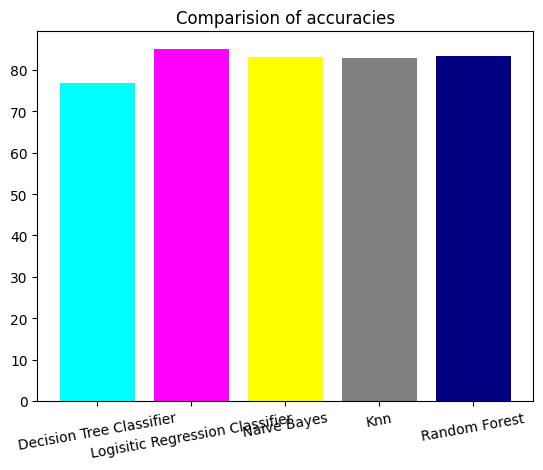

In [51]:
l=[dtc_accuracy,lr_accuracy,nv_accuracy,knn_accuracy,rf_accuracy]
m=['Decision Tree Classifier','Logisitic Regression Classifier','Naive Bayes','Knn','Random Forest']
plt.bar(m,l,color=[ '#00FFFF', '#FF00FF','#FFFF00','#808080','#000080'])
plt.xticks(rotation=10)
plt.title("Comparision of accuracies")
plt.show()

# Conclusion-
### Understanding Accuracy Score - 

Based on the accuracy scores provided, the `Random Forest` classifier gives the best fit model for the airline dataset. The accuracy score for the `Random Forest classifier` is `83.49%` , indicating that it approximately predicted all instances in the test set.

On the other hand, the `GaussianNB classifier` achieved an accuracy score of `83.25%`, and the `Decision Tree Classifier` achieved an accuracy score of `76.92%`and the `K Nearest Neighbours Classifier` achieved an accuracy score `82.93%`. While three classifiers have good accuracy scores, the `Random Forest classifier` achieved a perfect score, indicating that it provided the best fit model for the `Airline Booking dataset` in terms of accuracy.


It's important to note that accuracy alone may not be the only metric to consider when evaluating classifier performance. Depending on the specific problem and requirements, other metrics such as precision, recall, or F1 score may provide a more comprehensive evaluation of the classifiers' performance. Additionally, it's recommended to perform further evaluation and validation techniques, such as cross-validation or assessing the models on unseen data, to ensure the chosen classifier's robustness and generalization ability.


Ultimately, the choice of the best algorithm depends on various factors, including the dataset size, the complexity of the relationships between features and the target, and the specific problem requirements. It's essential to experiment with multiple algorithms and perform proper evaluation and validation to select the most appropriate one for your specific problem.
